## OPT Attention Map

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns



torch.Size([1, 83, 32, 80])


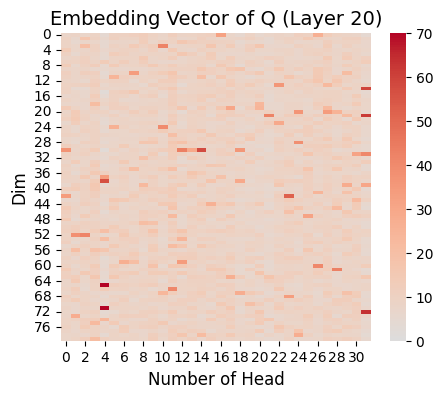

torch.Size([1, 83, 32, 80])


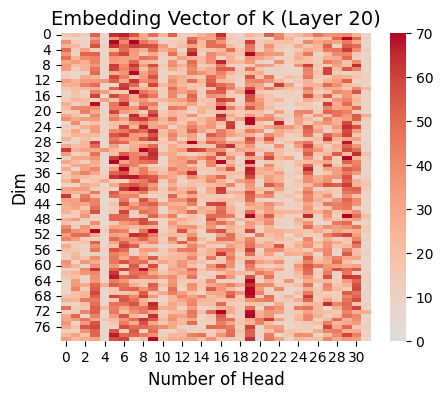

torch.Size([1, 83, 32, 80])


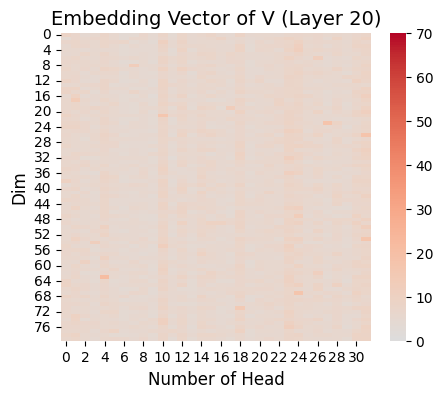

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import torch
components = ['Q', 'K', 'V']
for i in components:
    
    path = f'../atten_exp/saved_attn_scores/facebook/opt-2.7b/{i.lower()}_merged_attn_weights_layer20.pt'
    attn_weights = torch.load(path)
    print(attn_weights.shape)
    q = attn_weights.norm(dim=1).squeeze().cpu().detach().numpy()
    # Create the heatmap
    plt.figure(figsize=(5, 4))  # Adjust the figure size for better readability
    sns.heatmap(
        q.T, 
        cmap="coolwarm",  # Use a blue-red diverging colormap
        vmin=0, vmax=70,  # Set color range to match the bar
        center=0,  # Center the colormap around 0
    )

    # Add titles and axis labels
    plt.title(f"Embedding Vector of {i} (Layer 20)", fontsize=14)
    plt.xlabel("Number of Head", fontsize=12)
    plt.ylabel("Dim", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    output_folder = "paper_result"
    os.makedirs(output_folder, exist_ok=True)  # Ensure the folder exists
    output_file = os.path.join(output_folder, f"OPT_{i}_attention_map_layer_20.pdf")
    plt.savefig(output_file, format="pdf",bbox_inches='tight')
    plt.show()




torch.Size([1, 141, 32, 128])


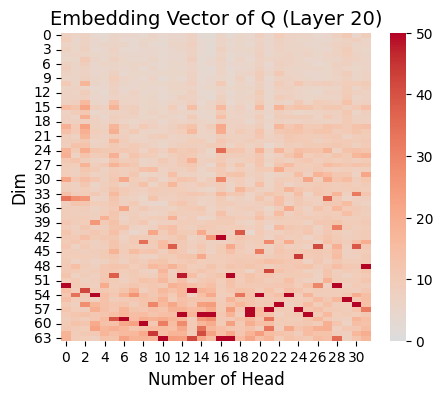

torch.Size([1, 141, 32, 128])


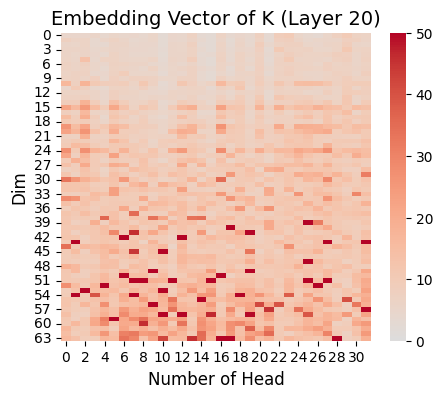

torch.Size([1, 66, 32, 128])


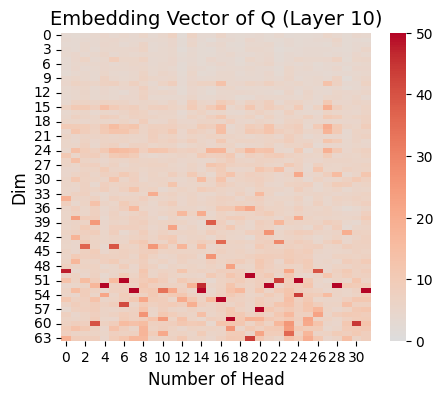

torch.Size([1, 66, 32, 128])


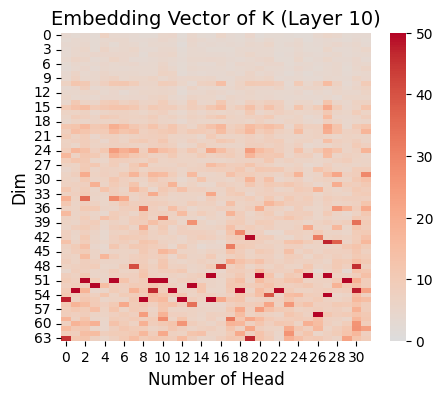

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import torch
components = ['Q', 'K']
for i in components:
    
    path = f'../atten_exp/saved_attn_scores/meta-llama/Llama-2-7b-chat-hf/{i.lower()}_merged_attn_weights_layer20.pt'
    attn_weights = torch.load(path)
    print(attn_weights.shape)


    q = attn_weights.norm(dim=1).squeeze().cpu().detach().numpy()
    q = q[:, 64:]
    # Create the heatmap
    plt.figure(figsize=(5, 4))  # Adjust the figure size for better readability
    sns.heatmap(
        q.T, 
        cmap="coolwarm",  # Use a blue-red diverging colormap
        vmin=0, vmax=50,  # Set color range to match the bar
        center=0,  # Center the colormap around 0
    )


    # Add titles and axis labels
    plt.title(f"Embedding Vector of {i} (Layer 20)", fontsize=14)
    plt.xlabel("Number of Head", fontsize=12)
    plt.ylabel("Dim", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    output_folder = "paper_result"
    os.makedirs(output_folder, exist_ok=True)  # Ensure the folder exists
    output_file = os.path.join(output_folder, f"Llama_{i}_attention_map_layer_20.pdf")
    plt.savefig(output_file, format="pdf",bbox_inches='tight')
    plt.show()
    
for i in components:
    
    path = atten_exp/saved_attn_scores/meta-llama/Llama-2-7b-chat-hf/{i.lower()}_merged_attn_weights_layer10.pt'
    attn_weights = torch.load(path)
    print(attn_weights.shape)


    q = attn_weights.norm(dim=1).squeeze().cpu().detach().numpy()
    q = q[:, 64:]
    # Create the heatmap
    plt.figure(figsize=(5, 4))  # Adjust the figure size for better readability
    sns.heatmap(
        q.T, 
        cmap="coolwarm",  # Use a blue-red diverging colormap
        vmin=0, vmax=50,  # Set color range to match the bar
        center=0,  # Center the colormap around 0
    )


    # Add titles and axis labels
    plt.title(f"Embedding Vector of {i} (Layer 10)", fontsize=14)
    plt.xlabel("Number of Head", fontsize=12)
    plt.ylabel("Dim", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    output_folder = "paper_result"
    os.makedirs(output_folder, exist_ok=True)  # Ensure the folder exists
    output_file = os.path.join(output_folder, f"Llama_{i}_attention_map_layer_10.pdf")
    plt.savefig(output_file, format="pdf",bbox_inches='tight')
    plt.show()

# GPT NEOX QKV MAP

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# File paths for query, key, value
paths = {
    "Query": 'saved_attn_scores/EleutherAI/gpt-neox-20b/attn_topk_idx_query_layer.pt',
    "Key": 'saved_attn_scores/EleutherAI/gpt-neox-20b/attn_topk_idx_key_layer.pt',
    "Value": 'saved_attn_scores/EleutherAI/gpt-neox-20b/attn_topk_idx_value_layer.pt'
}

output_folder = "/common/home/mj939/atten_exp/new_result"
os.makedirs(output_folder, exist_ok=True)

for name, path in paths.items():
    # Load and process tensor
    attn_weights = torch.load(path)
    q = attn_weights.norm(dim=2).squeeze().cpu().detach().numpy().T  # Shape: [dim, head]

    # Plot heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        q,
        cmap="coolwarm",
        vmin=0, vmax=50,
        center=0,
    )
    plt.title(f"Embedding Vector of {name} in GPT-NEOX (Layer 1)", fontsize=14)
    plt.xlabel("Number of Head", fontsize=12)
    plt.ylabel("Dim", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Save to file
    filename = f"GPTNEOX_{name.lower()}_vector_layer1_heatmap.pdf"
    plt.savefig(os.path.join(output_folder, filename), bbox_inches='tight')
    plt.close()
